17.35 Worst case bond portfolio value

(b) $V^{wc}= c^T (\exp(-ty_{max})_{t=1}^T)$

In [1]:
import numpy as np
import cvxpy as cp
from matplotlib import pyplot as plt

In [2]:
y_nom = np.array([0.02721006, 0.02841466, 0.02897469, 0.02953471, 0.03022069,
       0.03090667, 0.03159264, 0.03227862, 0.0327625 , 0.03324637,
       0.03373025, 0.03421413, 0.03467149, 0.03512885, 0.03558622,
       0.03604358, 0.03650095, 0.03695831, 0.03741567, 0.03787304,
       0.03823771, 0.03860239, 0.03896707, 0.03933175, 0.03969642,
       0.0400611 , 0.04042578, 0.04079046, 0.04098345, 0.04117644,
       0.04136943, 0.04156242, 0.04175541, 0.0419484 , 0.04214139,
       0.04233438, 0.04252737, 0.04272036, 0.04291335, 0.04310634,
       0.04317059, 0.04323485, 0.0432991 , 0.04336336, 0.04342761,
       0.04349187, 0.04355612, 0.04362038, 0.04368463, 0.04374888,
       0.04381314, 0.04387739, 0.04394165, 0.0440059 , 0.04407016,
       0.04413441, 0.04419866, 0.04426292, 0.04432717, 0.04439143,
       0.04445568, 0.04451994, 0.04458419, 0.04464845, 0.0447127 ,
       0.04477695, 0.04484121, 0.04490546, 0.04496972, 0.04503397,
       0.04509823, 0.04516248, 0.04522674, 0.04529099, 0.04535524,
       0.0454195 , 0.04548375, 0.04554801, 0.04561226, 0.04567652,
       0.04574077, 0.04580503, 0.04586928, 0.04593353, 0.04599779,
       0.04606204, 0.0461263 , 0.04619055, 0.04625481, 0.04631906,
       0.04638332, 0.04644757, 0.04651182, 0.04657608, 0.04664033,
       0.04670459, 0.04676884, 0.0468331 , 0.04689735, 0.04696161,
       0.04702586, 0.04709011, 0.04715437, 0.04721862, 0.04728288,
       0.04734713, 0.04741139, 0.04747564, 0.04753989, 0.04760415,
       0.0476684 , 0.04773266, 0.04779691, 0.04786117, 0.04792542,
       0.04798968, 0.04805393, 0.04811818, 0.04818244, 0.04824669])/4

T = len(y_nom)

t = np.arange(1,T+1).astype(float)

c = np.zeros(T)
c[:10] = 1
c[-10:] = 1.2

rho = .004/4
kappa = .02/4

In [19]:
delta = cp.Variable(T)
objective = cp.Minimize(c.T @ cp.exp(- cp.multiply(np.arange(1, T+1), (y_nom + delta))))
constraints = [
    delta[0] == 0, 
    cp.sum(delta) == 0, 
    -kappa <= delta,
    delta <= kappa,
    cp.norm(delta[1:] - delta[:-1], 2) <= rho
]
prob = cp.Problem(objective, constraints)
result = prob.solve()
V_wc = objective.value
print('worst case portfolio value:', V_wc)
y_wc = y_nom + delta.value # worst case yield curve
V_nom = c.T @ np.exp(- np.arange(1, T+1).T * y_nom) 
print('nominal value:', V_nom)

worst case portfolio value: 11.319833306522309
nominal value: 12.585558808688951


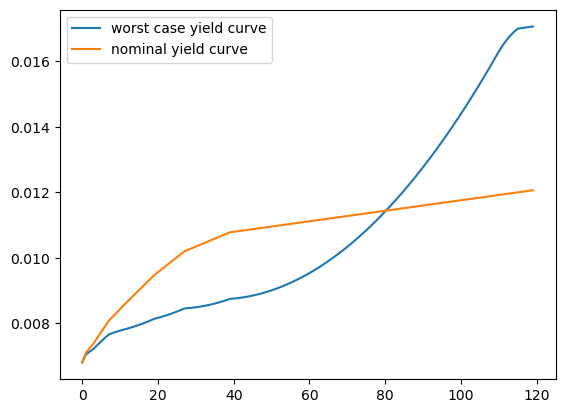

In [20]:
plt.plot(y_wc, label='worst case yield curve')
plt.plot(y_nom, label='nominal yield curve')
plt.legend()
plt.show()